In [1]:
# ---------- CÉLULA 1: Configuração inicial e carregamento ----------

import os
import sys
import random
from datetime import timedelta, datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reprodutibilidade
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

# Mostrar versões (útil para reproducibilidade)
import sklearn
import matplotlib
print("Python:", sys.version.split()[0])
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("scikit-learn:", sklearn.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

# Listar arquivos na pasta data para confirmar
print("\nArquivos na pasta 'data':")
try:
    print(os.listdir('data'))
except FileNotFoundError:
    print("Pasta 'data' não encontrada. Coloque o dataset em 'data/' ou ajuste o caminho.")

# Carregar dataset (ajuste o nome se necessário)
DATA_PATH = 'data/train.csv'   # ajuste aqui se for outro nome
if os.path.exists(DATA_PATH):
    df = pd.read_csv(DATA_PATH)
    print("\nDataset carregado com sucesso. Shape:", df.shape)
    display(df.head())
else:
    print(f"\nArquivo não encontrado em {DATA_PATH}. Verifique o caminho e o nome do arquivo.")


Python: 3.12.7
pandas: 2.2.2
numpy: 1.26.4
scikit-learn: 1.5.1
matplotlib: 3.9.2
seaborn: 0.13.2

Arquivos na pasta 'data':
['store.csv', 'test.csv', 'train.csv']


C:\Users\geise\AppData\Local\Temp\ipykernel_25036\1286185503.py:38: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)



Dataset carregado com sucesso. Shape: (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [2]:
# ---------- CÉLULA 2: EDA inicial ----------

# Garantir que StateHoliday seja string (evita warning de tipos mistos)
df['StateHoliday'] = df['StateHoliday'].astype(str)

# 1. Info geral
print("=== INFO GERAL ===")
print(df.info())

# 2. Valores nulos
print("\n=== VALORES NULOS POR COLUNA ===")
print(df.isnull().sum())

# 3. Estatísticas descritivas numéricas
print("\n=== ESTATÍSTICAS NUMÉRICAS ===")
display(df.describe())

# 4. Valores únicos por coluna (amostra)
print("\n=== VALORES ÚNICOS POR COLUNA ===")
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} valores únicos")

# 5. Amostra de valores de StateHoliday
print("\nAmostra de valores em StateHoliday:", df['StateHoliday'].unique())


=== INFO GERAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None

=== VALORES NULOS POR COLUNA ===
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

=== ESTATÍSTICAS NUMÉRICAS ===


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00



=== VALORES ÚNICOS POR COLUNA ===
Store: 1115 valores únicos
DayOfWeek: 7 valores únicos
Date: 942 valores únicos
Sales: 21734 valores únicos
Customers: 4086 valores únicos
Open: 2 valores únicos
Promo: 2 valores únicos
StateHoliday: 4 valores únicos
SchoolHoliday: 2 valores únicos

Amostra de valores em StateHoliday: ['0' 'a' 'b' 'c']


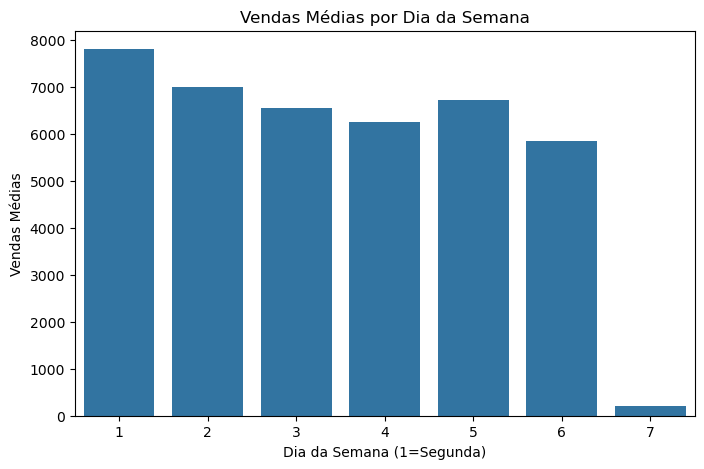

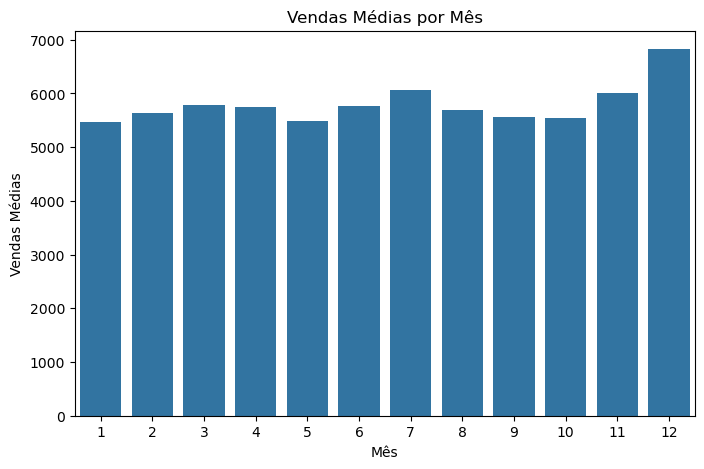

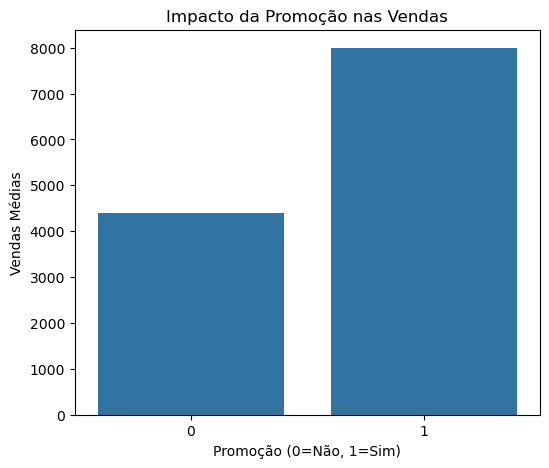

In [3]:
# ---------- CÉLULA 3: Engenharia de features + EDA visual ----------

# 1. Converter Date para datetime
df['Date'] = pd.to_datetime(df['Date'])

# 2. Criar novas colunas
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['IsWeekend'] = df['DayOfWeek'].isin([6, 7]).astype(int)  # sábado=6, domingo=7

# 3. Mapeamento de StateHoliday para rótulos mais claros
holiday_map = {'0': 'None', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'}
df['StateHolidayName'] = df['StateHoliday'].map(holiday_map)

# 4. Gráfico — vendas médias por dia da semana
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='DayOfWeek', y='Sales', estimator='mean', errorbar=None)
plt.title('Vendas Médias por Dia da Semana')
plt.xlabel('Dia da Semana (1=Segunda)')
plt.ylabel('Vendas Médias')
plt.show()

# 5. Gráfico — vendas médias por mês
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Month', y='Sales', estimator='mean', errorbar=None)
plt.title('Vendas Médias por Mês')
plt.xlabel('Mês')
plt.ylabel('Vendas Médias')
plt.show()

# 6. Gráfico — vendas médias com e sem promoção
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='Promo', y='Sales', estimator='mean', errorbar=None)
plt.title('Impacto da Promoção nas Vendas')
plt.xlabel('Promoção (0=Não, 1=Sim)')
plt.ylabel('Vendas Médias')
plt.show()


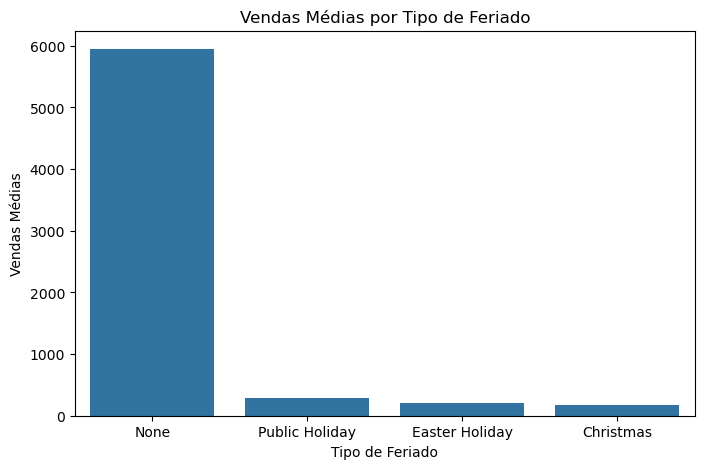

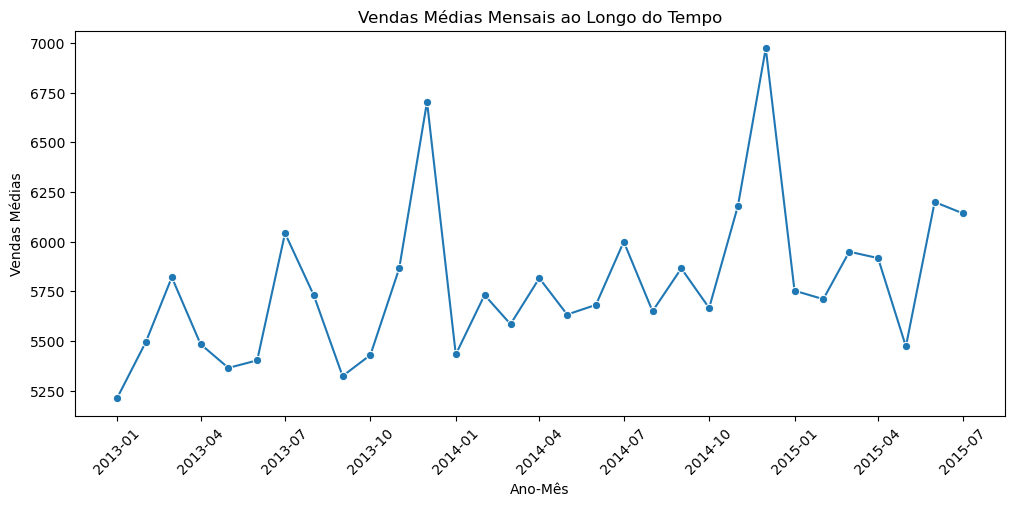

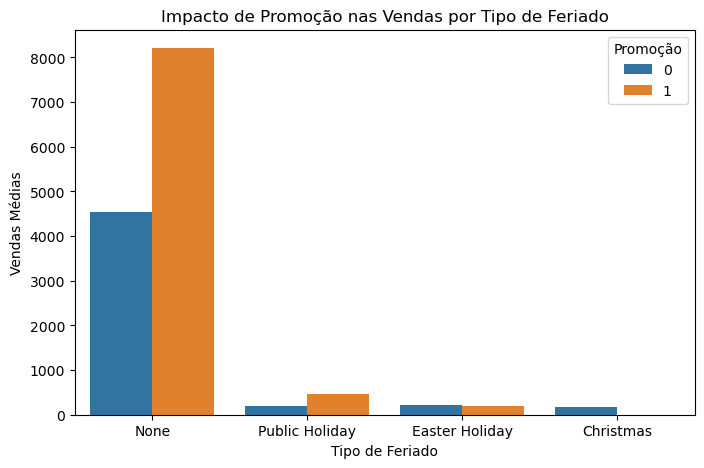

In [4]:
# ---------- CÉLULA 4: Análise de feriados e sazonalidade ----------

# Vendas médias por tipo de feriado
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='StateHolidayName', y='Sales', estimator='mean', errorbar=None)
plt.title('Vendas Médias por Tipo de Feriado')
plt.xlabel('Tipo de Feriado')
plt.ylabel('Vendas Médias')
plt.show()

# Vendas ao longo do tempo (média por mês/ano)
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].mean().reset_index()
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str) + '-01')

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Sales', marker='o')
plt.title('Vendas Médias Mensais ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Vendas Médias')
plt.xticks(rotation=45)
plt.show()

# Impacto de promoção em dias de feriado
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='StateHolidayName', y='Sales', hue='Promo', estimator='mean', errorbar=None)
plt.title('Impacto de Promoção nas Vendas por Tipo de Feriado')
plt.xlabel('Tipo de Feriado')
plt.ylabel('Vendas Médias')
plt.legend(title='Promoção')
plt.show()


In [5]:
# ---------- CÉLULA 5: Pré-processamento ----------

from sklearn.model_selection import train_test_split

# Remover dias em que a loja estava fechada
df_model = df[df['Open'] == 1].copy()

# One-hot encoding para StateHoliday
df_model = pd.get_dummies(df_model, columns=['StateHolidayName'], drop_first=True)

# Features e target
features = ['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day', 'IsWeekend'] + \
           [col for col in df_model.columns if col.startswith('StateHolidayName_')]
target = 'Sales'

X = df_model[features]
y = df_model[target]

# Dividir em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

print(f"Tamanho treino: {X_train.shape}, Tamanho teste: {X_test.shape}")


Tamanho treino: (675513, 11), Tamanho teste: (168879, 11)


In [17]:
# ---------- CÉLULA 6: Modelo Baseline RandomForest ----------

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import numpy as np
import pandas as pd
import os

# Treinar modelo baseline
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Previsões no teste
y_pred = rf_model.predict(X_test)

# === Métricas ===
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAPE corrigido (ignora valores reais iguais a zero para evitar divisão por zero)
mask = y_test != 0
mape = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100

# R²
r2 = r2_score(y_test, y_pred)

print("=== Métricas Baseline RandomForest ===")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")

# === Importância das features ===
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n=== Importância das Features ===")
display(feature_importance)

# === Salvar modelo baseline ===
os.makedirs("models", exist_ok=True)
joblib.dump(rf_model, "models/rf_sales_model_baseline.pkl")
print("\nModelo baseline salvo em 'models/rf_sales_model_baseline.pkl'")


=== Métricas Baseline RandomForest ===
RMSE: 1,639.27
MAPE: 15.25%
R²: 0.7214

=== Importância das Features ===


,Feature,Importance
0,Store,0.691776
2,Promo,0.135761
1,DayOfWeek,0.054568
6,Day,0.046721
5,Month,0.044846
4,Year,0.011344
3,SchoolHoliday,0.007569
7,IsWeekend,0.006091
9,StateHolidayName_None,0.000694
10,StateHolidayName_Public Holiday,0.000418



Modelo baseline salvo em 'models/rf_sales_model_baseline.pkl'


In [19]:
# ---------- CÉLULA 7: Previsões Futuras (30 dias) ----------

from datetime import timedelta

# Última data no dataset
last_date = df['Date'].max()
print("Última data no dataset:", last_date.date())

# Criar intervalo de 30 dias futuros
future_dates = pd.date_range(last_date + timedelta(days=1), periods=30, freq='D')

# Todas as lojas
stores = df['Store'].unique()

# Criar dataframe base para previsões futuras
future_df = pd.DataFrame([
    [store, date, date.weekday()+1, 0, 0, date.year, date.month, date.day, int((date.weekday()+1) in [6, 7])]
    for store in stores
    for date in future_dates
], columns=['Store', 'Date', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day', 'IsWeekend'])

# Adicionar colunas de feriado igual no treino (assumindo sem feriado, pode ajustar manualmente)
for col in [c for c in df_model.columns if c.startswith('StateHolidayName_')]:
    future_df[col] = 0

# Previsões
future_df['PredictedSales'] = rf_model.predict(future_df[features])

# Salvar
os.makedirs("outputs", exist_ok=True)
future_df.to_csv("outputs/predictions_future.csv", index=False)

print("Previsões futuras salvas em 'outputs/predictions_future.csv'")
display(future_df.head())


Última data no dataset: 2015-07-31
Previsões futuras salvas em 'outputs/predictions_future.csv'


,Store,Date,DayOfWeek,Promo,SchoolHoliday,Year,Month,Day,IsWeekend,StateHolidayName_Easter Holiday,StateHolidayName_None,StateHolidayName_Public Holiday,PredictedSales
0,1,2015-08-01,6,0,0,2015,8,1,1,0,0,0,5138.12
1,1,2015-08-02,7,0,0,2015,8,2,1,0,0,0,13089.67
2,1,2015-08-03,1,0,0,2015,8,3,0,0,0,0,4612.85
3,1,2015-08-04,2,0,0,2015,8,4,0,0,0,0,4551.30
4,1,2015-08-05,3,0,0,2015,8,5,0,0,0,0,5424.07


In [21]:
# ---------- CÉLULA 8: Previsões no Conjunto de Teste ----------

# Criar dataframe com resultados do teste
pred_test_df = X_test.copy()
pred_test_df['ActualSales'] = y_test
pred_test_df['PredictedSales'] = y_pred

# Salvar
pred_test_df.to_csv("outputs/predictions_test.csv", index=False)

print("Previsões no conjunto de teste salvas em 'outputs/predictions_test.csv'")
display(pred_test_df.head())


Previsões no conjunto de teste salvas em 'outputs/predictions_test.csv'


,Store,DayOfWeek,Promo,SchoolHoliday,Year,Month,Day,IsWeekend,StateHolidayName_Easter Holiday,StateHolidayName_None,StateHolidayName_Public Holiday,ActualSales,PredictedSales
377759,239,6,0,0,2014,8,2,1,False,True,False,5203,4663.92
865636,67,4,1,0,2013,5,16,0,False,True,False,8590,8230.20
114355,626,1,0,0,2015,4,20,0,False,True,False,6465,5777.19
9537,618,4,0,0,2015,7,23,0,False,True,False,7250,5356.30
549094,185,1,0,0,2014,2,24,0,False,True,False,4339,5236.89


In [25]:
# ---------- CÉLULA 9: README Automático  ----------

readme_content = f"""# Previsão de Vendas no Varejo

## Objetivo
Prever vendas diárias por loja, identificar impacto de promoções, sazonalidade e variáveis mais relevantes.

## Dataset
Colunas: Store, Sales, Customers, Promo, StateHoliday, SchoolHoliday, Open, Date.

## Resultados do Modelo
- RMSE: {rmse:,.2f}
- MAPE: {mape:.2f}%
- R²: {r2:.4f}

## Saídas
- Modelo treinado (baseline): models/rf_sales_model_baseline.pkl
- Previsões no conjunto de teste: outputs/predictions_test.csv
- Previsões futuras (30 dias): outputs/predictions_future.csv

## Como Rodar
pip install -r requirements.txt
jupyter notebook notebooks/analysis.ipynb
"""

with open("README.md", "w", encoding="utf-8") as f:
    f.write(readme_content)

print("README.md gerado.")


README.md gerado.


In [29]:
# ---------- CÉLULA 10: requirements.txt ----------

reqs = [
    "numpy",
    "pandas",
    "scikit-learn",
    "matplotlib",
    "seaborn",
    "joblib"
]

with open("requirements.txt", "w") as f:
    f.write("\n".join(reqs))

print("requirements.txt criado.")


requirements.txt criado.


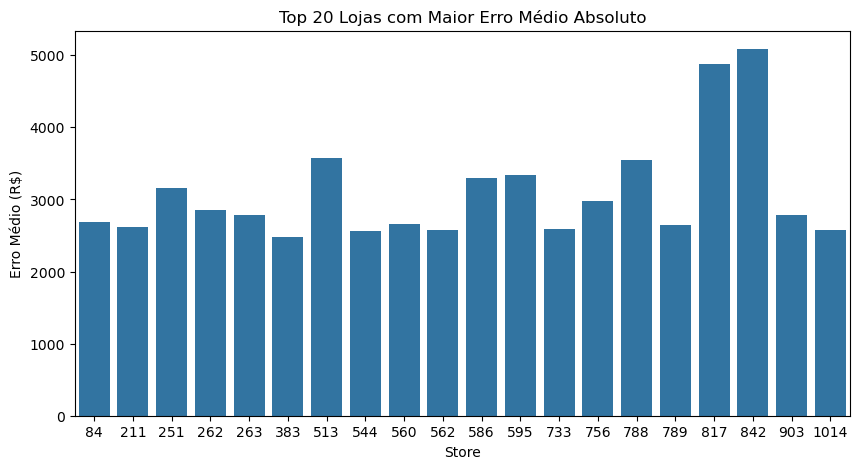

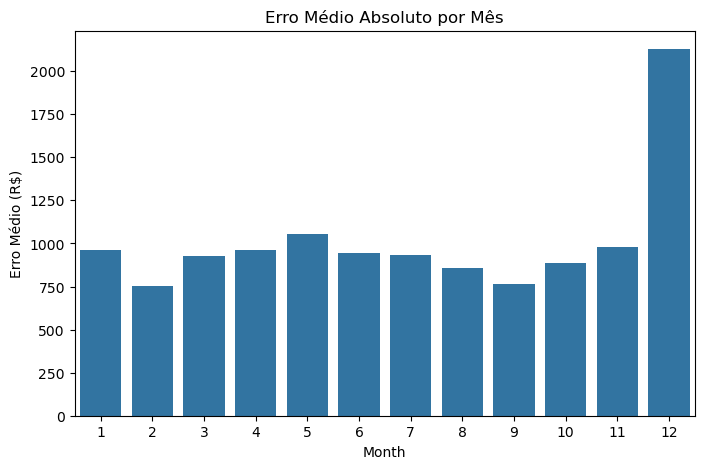

Arquivo de análise de erros salvo em 'outputs/error_analysis.csv'


In [33]:
# ---------- CÉLULA 11: Análise de Erros  ----------

# Garantir que temos as datas no X_test
# Vamos recuperar a coluna 'Date' do df_model antes de remover do X
X_test_with_dates = df_model.loc[X_test.index].copy()
X_test_with_dates['Date'] = df_model.loc[X_test.index, 'Date']

# Criar dataframe com erros
error_df = X_test_with_dates.copy()
error_df['ActualSales'] = y_test
error_df['PredictedSales'] = y_pred
error_df['AbsoluteError'] = (error_df['ActualSales'] - error_df['PredictedSales']).abs()
error_df['PctError'] = error_df['AbsoluteError'] / error_df['ActualSales'].replace(0, np.nan) * 100
error_df['Month'] = error_df['Date'].dt.month

# --- Erro médio por loja ---
error_store = error_df.groupby('Store')['AbsoluteError'].mean().reset_index()
error_store = error_store.sort_values('AbsoluteError', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=error_store.head(20), x='Store', y='AbsoluteError')
plt.title('Top 20 Lojas com Maior Erro Médio Absoluto')
plt.ylabel('Erro Médio (R$)')
plt.show()

# --- Erro médio por mês ---
error_month = error_df.groupby('Month')['AbsoluteError'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=error_month, x='Month', y='AbsoluteError')
plt.title('Erro Médio Absoluto por Mês')
plt.ylabel('Erro Médio (R$)')
plt.show()

# Salvar análises
error_df.to_csv("outputs/error_analysis.csv", index=False)
print("Arquivo de análise de erros salvo em 'outputs/error_analysis.csv'")


In [35]:
# ---------- CÉLULA 12: Estrutura Final ----------

# Criar pastas padrão se não existirem
folders = ["data", "models", "outputs", "notebooks", "src"]
for folder in folders:
    os.makedirs(folder, exist_ok=True)

# Mensagem de conclusão
print("Estrutura de pastas criada/confirmada:")
for folder in folders:
    print(f"- {folder}/")

print("\nProjeto pronto para envio ao GitHub.")
print("Inclua todos os arquivos necessários e execute:")
print("git init")
print("git add .")
print("git commit -m 'Projeto previsão de vendas'")
print("git branch -M main")
print("git remote add origin <URL_DO_SEU_REPOSITORIO>")
print("git push -u origin main")


Estrutura de pastas criada/confirmada:
- data/
- models/
- outputs/
- notebooks/
- src/

Projeto pronto para envio ao GitHub.
Inclua todos os arquivos necessários e execute:
git init
git add .
git commit -m 'Projeto previsão de vendas'
git branch -M main
git remote add origin <URL_DO_SEU_REPOSITORIO>
git push -u origin main
